Hands-on tutorial with deep learning frameworks

References 

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/

# Recap 

##Neural Networks

Summary: A Neural Network is a function that takes an input of **features** and ouputs a **prediction**. The input goes through a series of **linear transformations** (affine function or weighted sum), followed by **activation functions**, until we get the output. We measure the **error** in its prediction through the **cost function** (aka. **loss**). We use this loss to **backpropagate** the **gradient** to update the **weights** by a small **learning rate**. We repeat this process until the model converges.

### Reference Equations
Not to use in the actual programming of a neural network. For intuition purposes. 

Forward propagation:
$$\text{repeat for each layer } l:$$
$$z^{[l]} = W^{[l]} a^{[l-1]} + b^{[l]} $$
$$a^{[l]} = g^{[l]}(z^{[l]})$$

Compute the cost function:
$$J(\theta)$$

Update weights of the network:
$$\theta =: \theta - \alpha \nabla J(\theta)$$



---

### Classification


If we were to predict the probability of a particular input pertaining to a certain class, we design the network so that it outputs a class probability score. This can be achieved with a **sigmoid** activation function. We often use a sigmoid activation for **binary classification**. 

$$S(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{e^x + 1}$$

But if we want to have multiple classes, then we use a **softmax** activation to ouput probabilities for each class. The output probabilities for each class sum to 1. The denominator acts as a normalizing term, as it sums up all the exponentials.

$$\sigma(z)_i = \frac{e^z_i}{\sum_{j=1}^{K} e^z_j} $$

$$\text{for} \space i = 1,\dots, K \space \text{and} \space \mathbf{z} = (z_1, \dots, z_K) $$

##Deep Learning

A **layer** is an abstract generalization of a transformation function, $f^{[l]}(a^{[l-1]})$, on the previous activations.
The key takeaway for the difference between a regular neural network and **deep neural network**, is that it has **more layers**. By abstracting the layer term when designing a model, we define the common types of layer in our code quickly. One example is the linear, or **fully connected** layer that we say before. In addition, we often apply common **tricks** to get a deep neural network to train effectively. 

Some things to consider when designing and training a deep model.

1.   How much data you have (labeled/unlabeled, classes/scores)
2.   How many layers / what type of layers (Fully connected layer)
3.   Activation functions (ReLU, sigmoid, softmax, tanh)
4.   Loss function (Mean Squared Error, logistic loss, cross entropy loss)
5.   Hyperparameters (learning rate, batch size)
7.   Optimization strategies (later)
8.   Regulization strategies (later)



##IMPORTANT: Before running make sure the runtime is set to GPU

On the top left, goto `Runtime` -> `Change runtime type`

Under `Hardware accelerator`, choose GPU

# Pytorch Tensors

A `Tensor` is a multidimentional matrix. 

So a matrix is a 2 dimensional `Tensor` (rows and columns). 

![alt text](https://www.kdnuggets.com/wp-content/uploads/scalar-vector-matrix-tensor.jpg)



Imports

In [0]:
import torch # the main pytorch package
import torchvision # pytorch for computer vision

import numpy as np # numpy package

import time # used for testing speed

## Creating tensors



In [0]:
torch.tensor(1)

tensor(1)

In [0]:
torch.tensor([1,2])

tensor([1, 2])

In [0]:
torch.tensor([[1,2],[3,4]])

tensor([[1, 2],
        [3, 4]])

In [0]:
torch.tensor([[[1,2], [3, 2]], [[1, 7], [5, 4]]])

tensor([[[1, 2],
         [3, 2]],

        [[1, 7],
         [5, 4]]])

### Numpy Likeness

Numpy is library for matrix math. It is common among data scientists.

Pytorch builds its functions and array accesses similar to numpy.

numpy array

In [0]:
xn = np.random.randn(3,4)
xn

array([[ 1.22787628, -0.07066772,  1.67570249,  0.05555446],
       [-0.07611304,  0.89505619,  0.09800224,  0.80853567],
       [-0.83608517, -0.35758708,  0.31818291,  2.15004324]])

pytorch tensor

In [0]:
xt = torch.randn(3,4)
xt

tensor([[ 0.5904,  0.2871,  0.6418, -0.1909],
        [-0.5642,  0.1597, -1.7733, -0.9664],
        [-0.0843,  0.9270, -1.9899,  0.8685]])

tensor to numpy

In [0]:
xt.numpy()

array([[ 0.5903583 ,  0.28708312,  0.64181674, -0.19094156],
       [-0.56420535,  0.1596745 , -1.7733214 , -0.9663939 ],
       [-0.084341  ,  0.9270021 , -1.9899423 ,  0.8684583 ]],
      dtype=float32)

numpy to tensor

In [0]:
torch.as_tensor(xn)

tensor([[ 1.2279, -0.0707,  1.6757,  0.0556],
        [-0.0761,  0.8951,  0.0980,  0.8085],
        [-0.8361, -0.3576,  0.3182,  2.1500]], dtype=torch.float64)

indexing is the same

In [0]:
# get fourth column
print(xn[:,3])

print(xt[:,3])
print(xt.numpy()[:,3])

[0.05555446 0.80853567 2.15004324]
tensor([-0.1909, -0.9664,  0.8685])
[-0.19094156 -0.9663939   0.8684583 ]


## Cuda Tensors
Allow faster operations on the GPU (select GPU runtime in colab)

In [0]:
def stop_watch(function):
    start = time.clock()
    function()
    duration = time.clock() - start
    print('took', duration, 'seconds')

In [0]:
#cpu
t1 = torch.randn(2000,1000)
t2 = torch.randn(1000,3000)

def multiply():
    # @ is shorthand for matrix multiply
    t3 = t1 @ t2
    
stop_watch(multiply)
    
    
# cuda
# put the tensors on the GPU
t1 = t1.cuda()
t2 = t2.cuda()

def cuda_multiply():
    t3 = t1 @ t2

stop_watch(cuda_multiply)

took 0.11701600000000001 seconds
took 0.0012389999999999901 seconds


#Autograd: Automatic Differentiation

In [0]:
# create x
x = torch.as_tensor(3.)
# make x require a gradient
x.requires_grad = True

In [0]:
# create the equation for y
y = 2*x + 1
y

tensor(7., grad_fn=<AddBackward0>)

Calculate $\frac{dy}{dx}$

More generally, calculates $dy$ with respect to all variables that have `requires_grad = True` with `.backward()`

In [0]:
# compute the derivatives
y.backward()

In [0]:
# show the gradient for x
x.grad

tensor(2.)

### Example
![alt text](https://i.imgur.com/zjAboLu.png)

In [0]:
# write your solution here

# define your variables with values

# make x require a gradient

# create the computation graph for f

# calculate the gradient backward

# print the gradient for x


### Solution

In [0]:
# possible solution
x = torch.tensor(-2., requires_grad=True)
y = torch.tensor(5)
z = torch.tensor(-4)

q = x + y
f = q * z
f.backward()
print(x.grad)

tensor(-4.)


### Autograd works the same for tensors

In [0]:
x = torch.as_tensor([1.,2.,3.])
print(x.requires_grad)

w = torch.as_tensor([2.,3.,1.])
w.requires_grad = True

b = -2.

# dot product plus bias
y = w @ x + b
y

False


tensor(9., grad_fn=<AddBackward0>)

In [0]:
loss = y - 5
print(loss)
loss.backward()

tensor(4., grad_fn=<SubBackward0>)


In [0]:
w.grad

tensor([1., 2., 3.])

In [0]:
print(w)
# update weights
w = w - 0.1 * w.grad
print(w)

tensor([2., 3., 1.], requires_grad=True)
tensor([1.9000, 2.8000, 0.7000], grad_fn=<SubBackward0>)


the loss now decreased

In [0]:
y = w @ x + b
loss = y - 5
loss

tensor(2.6000, grad_fn=<SubBackward0>)

# Neural Networks

## MNIST dataset

MNIST is a dataset of black and white handwritten digits with labels 0 through 9.
The image is 28 by 28 in size.

In [0]:
dataset = torchvision.datasets.MNIST('/content', download=True)

dataset

0it [00:00, ?it/s]

100%|█████████▉| 9887744/9912422 [01:00<00:00, 310676.90it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz



0it [00:00, ?it/s]
  0%|          | 0/28881 [00:00<?, ?it/s]


32768it [00:00, 129212.63it/s]           
0it [00:00, ?it/s]
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz



 98%|█████████▊| 1613824/1648877 [00:05<00:00, 482601.02it/s]
1654784it [00:05, 304104.76it/s]                             
0it [00:00, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz



  0%|          | 0/4542 [00:00<?, ?it/s]
8192it [00:00, 48913.93it/s]            

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


Dataset MNIST
    Number of datapoints: 60000
    Root location: /content
    Split: Train

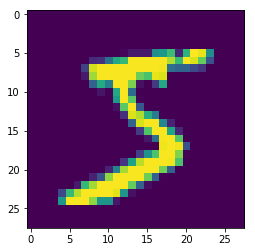

In [0]:
import matplotlib.pyplot as plt
plt.imshow(dataset.data[0].numpy())

##Building a Neural Network with Tensors

Shape of the training data

In [0]:
dataset.data.shape

torch.Size([60000, 28, 28])

Define our network.

input 28x28 -> hidden layer 100 -> 10 label outputs

$w_1 = (100, 784)$,
$b_1 = (100,)$,
$w_2 = (10, 100)$,
$b_2 = (10, )$

In [0]:
device = 'cuda'

In [0]:
input_size = 28 * 28 # = 784
layer1_size = 100
layer2_size = 10


w1 = 0.01 * torch.randn(layer1_size, input_size).to(device)
b1 = torch.zeros(layer1_size).to(device)
w2 = 0.01 * torch.randn(layer2_size, layer1_size).to(device)
b2 = torch.zeros(layer2_size).to(device)


w1.requires_grad_()
b1.requires_grad_()
w2.requires_grad_()
b2.requires_grad_()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0',
       requires_grad=True)

https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/

softmax(x) = $\frac{e^x}{\sum e^x}$

relu(x) = $max(x, 0)$


model(x):

$z_1 = w_1 x + b_1$

$a_1 = relu(z_1)$

$z_2 = w_2 a_1 + b_2$

$a_2 = softmax(z_2)$

In [0]:
import torch.nn.functional as F

In [0]:
def softmax(x):
    # output a vector of probabilities with its sum equal to 1.
    return torch.exp(x) / torch.sum(torch.exp(x))

def relu(x):
    # take the element wise max with 0.
    return F.relu(x)

def model(x):
    z1 = w1 @ x + b1
    a1 = relu(z1)
    z2 = w2 @ a1 + b2
    a2 = softmax(z2)
    return a2

In [0]:
def cross_entropy(predictions, labels):
    return F.cross_entropy(input=predictions.unsqueeze(0), target=labels.unsqueeze(0))

In [0]:
from tqdm import tqdm

In [0]:
dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [0]:
learning_rate = 0.001
training_iterations = 1
history = []
X = dataset.data.to(device)
Y = dataset.targets.to(device)

m = X.size(0)
for step in range(training_iterations):
    epoch_loss = 0
    count_correct = 0
    for i in tqdm(range(m)):
        x = X[i].float()
        y = Y[i]
        
        predictions = model(x.view(-1))
        loss = cross_entropy(predictions, y)
        
        epoch_loss += float(loss)
        loss.backward()
        with torch.no_grad():
            w1 -= learning_rate * w1.grad
            b1 -= learning_rate * b1.grad
            w2 -= learning_rate * w2.grad
            b2 -= learning_rate * b2.grad
        
    history.append(epoch_loss)




  0%|          | 0/60000 [00:00<?, ?it/s]


  0%|          | 122/60000 [00:00<00:49, 1217.59it/s]


  0%|          | 240/60000 [00:00<00:49, 1205.24it/s]


  1%|          | 361/60000 [00:00<00:49, 1206.07it/s]


  1%|          | 482/60000 [00:00<00:49, 1204.16it/s]


  1%|          | 597/60000 [00:00<00:50, 1186.26it/s]


  1%|          | 711/60000 [00:00<00:50, 1171.45it/s]


  1%|▏         | 824/60000 [00:00<00:51, 1156.01it/s]


  2%|▏         | 935/60000 [00:00<00:51, 1139.92it/s]


  2%|▏         | 1045/60000 [00:00<00:52, 1127.01it/s]


  2%|▏         | 1160/60000 [00:01<00:51, 1131.64it/s]


  2%|▏         | 1274/60000 [00:01<00:51, 1132.39it/s]


  2%|▏         | 1389/60000 [00:01<00:51, 1136.91it/s]


  3%|▎         | 1502/60000 [00:01<00:51, 1132.94it/s]


  3%|▎         | 1616/60000 [00:01<00:51, 1134.32it/s]


  3%|▎         | 1730/60000 [00:01<00:51, 1135.86it/s]


  3%|▎         | 1844/60000 [00:01<00:51, 1119.22it/s]


  3%|▎         | 1956/60000 [00:01<00:52, 1110.38

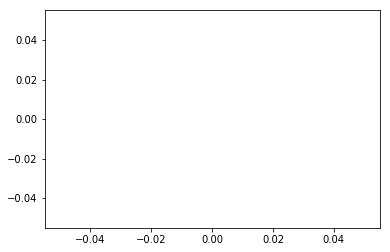

In [0]:
plt.plot(history)

## Building a Neural Network with Pytorch Abstractions

In [0]:
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset

from tqdm import tqdm

In [0]:
model = nn.Sequential(
    nn.Linear(input_size, layer1_size),
    nn.ReLU(),
    nn.Linear(layer1_size, layer2_size),
    nn.Softmax(dim=0)
)
model.cuda()

cross_entropy = nn.CrossEntropyLoss()

In [0]:
learning_rate = 0.01
opt = optim.SGD(model.parameters(), lr=learning_rate)

In [0]:
new_dataset = TensorDataset(dataset.data.view(-1, 28 * 28).float(), dataset.targets)
dataloader = DataLoader(new_dataset, batch_size= 512)

In [0]:
iterations = 100
history = []
for epoch in tqdm(range(iterations)):
    total_loss = 0
    for x, y in dataloader:
        predictions = model(x.cuda())
        loss = cross_entropy(predictions, y.cuda())
        total_loss += float(loss)

        loss.backward()
        opt.zero_grad()
    
        opt.step()
    history.append(total_loss)




  0%|          | 0/100 [00:00<?, ?it/s]


  1%|          | 1/100 [00:00<00:57,  1.71it/s]


  2%|▏         | 2/100 [00:01<00:55,  1.77it/s]


  3%|▎         | 3/100 [00:01<00:55,  1.76it/s]


  4%|▍         | 4/100 [00:02<00:53,  1.80it/s]


  5%|▌         | 5/100 [00:02<00:53,  1.78it/s]


  6%|▌         | 6/100 [00:03<00:51,  1.81it/s]


  7%|▋         | 7/100 [00:03<00:51,  1.79it/s]


  8%|▊         | 8/100 [00:04<00:50,  1.83it/s]


  9%|▉         | 9/100 [00:05<00:51,  1.78it/s]


 10%|█         | 10/100 [00:05<00:49,  1.82it/s]


 11%|█         | 11/100 [00:06<00:47,  1.87it/s]


 12%|█▏        | 12/100 [00:06<00:48,  1.82it/s]


 13%|█▎        | 13/100 [00:07<00:46,  1.85it/s]


 14%|█▍        | 14/100 [00:07<00:45,  1.87it/s]


 15%|█▌        | 15/100 [00:08<00:46,  1.82it/s]


 16%|█▌        | 16/100 [00:08<00:45,  1.85it/s]


 17%|█▋        | 17/100 [00:09<00:45,  1.82it/s]


 18%|█▊        | 18/100 [00:09<00:44,  1.83it/s]


 19%|█▉        | 19/100 [00:10<00:43,  1.85it/

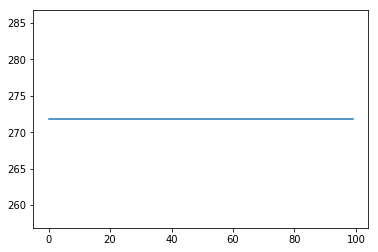

In [0]:
plt.plot(history)